In [8]:
from genetic_algorithm.GA import GeneticAlgorithm as GA
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import functools

In [9]:

flows = np.loadtxt("Chr12/Chr12A.csv", delimiter=",")
distances = np.loadtxt("Chr12/Chr12B.csv", delimiter=",")

# Obtenemos el número de entidades
n = flows.shape[0]

# Funcion de Costo

In [10]:
def f(x: list[int], flows: np.ndarray, distances: np.ndarray) -> float:
    """Función objetivo para el Problema de Asignación Cuadrática.

    Parameters
    ----------
    x : list[int]
        La solución a evaluar, es decir, la permutación de las entidades. Es de tamaño n.
    flows : np.ndarray
		Matriz de flujos. Es de tamaño nxn.
    distances : np.ndarray
		Matriz de distancias. Es de tamaño nxn.

    Returns
    -------
    float
        Costo de la solución x.
    """

    # Obtenemos el número de entidades
    n = len(x)

    # Acumulador para el calculo del costo
    cost = 0

    for i in range(n):
        for j in range(n):
            cost += flows[i, j] * distances[x[i] - 1, x[j] - 1]

    return cost

# Se fijan los valores de flows y distances
fn = functools.partial(f, flows=flows, distances=distances)

# Experimento 1

In [15]:

parametros = {
    "stopping_criteria_type":"nochangebest",
    "max_nochange_best": 600,
    "population_size": 100,
    "selection_operator": "tournament",
    "crossover_operator": "kpoints",
    "mutation_operator":"swap",
    "problem_type": "COP",
    "limits":(0,n),
	"min_or_max": "min",
    "codification": "permutation"
}

In [16]:
ga = GA(**parametros)

In [17]:
colors = ga.evolve(fn)

 Generations 0 | call_functions 100 | Best: 22978.00

 Generations 614 | call_functions 61500 | Best: 1170.00

Tiempo de ejecución: 00:00:10


 Generations 615 | call_functions 61500 | Best: 1170.00 

1170.0
[5 5 3 5 7 5 3 3 1 7 1 7]


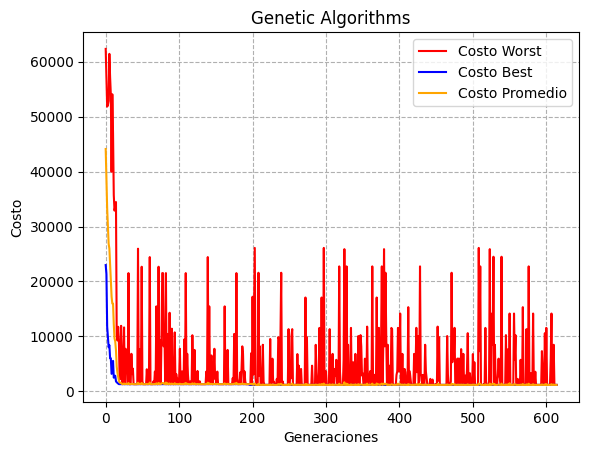

In [18]:
print(colors.fitness)
print(colors.genotype)

plt.plot(range(len(ga._cost_worst)), [x for x in ga._cost_worst ], color ='red', label ="Costo Worst")
plt.plot(range(len(ga._cost_best)), [x for x in ga._cost_best ], color ='blue', label ="Costo Best")
plt.plot(range(len(ga._cost_prom)), [x for x in ga._cost_prom ], color ='orange', label ="Costo Promedio")
plt.grid(True, linestyle='dashed')
plt.xlabel('Generaciones')
plt.ylabel('Costo')
plt.title('Genetic Algorithms')
plt.legend()
plt.show()
